Multi-armed Bandits

This exercise explains reinforcement learning in one of its simplest forms using probability theory. The multi-armed bandit problem is an easy way to begin to understand basic reward-based decision making. The thought experiment may go like this:

A gambler shows up to a casino and walks up to the slot machines which normally each have one lever, or arm. These tranditional slot machines are also referred to as "one-armed bandits". One of the slot machines however has multiple levers (multi-armed bandit) and this is where our gambler resides, however it is played a bit differently. Each of its levers has a continuous probabalistic range of potential rewards but the gambler does not know which one returns higher values more consistently. It is up to the gambler to learn by trial and error through pulling a lever and estimating its expected return. However if there are many levers the gambler may want to explore their expected return to see if he can optimize his reward.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
'm' is the point where the rewards will center around.
'mean' is the moving mean that will be updated after each lever pull.
'N' is the number of lever pulls.

The pull method picks a random value from the normal distribution (mean = 0, sd = 1) centered around the 'm' value.
The update method updates the selected bandit's mean after each pull makeing it a moving average.
"""

class Bandit_lever:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

There can be any number of "bandits" or slot machine levers but for simplicities sake I will use 3 to demonstrate the concepts above. First the multi-armed bandit must be constructed using multiple Bandit_levers. Then an array of empty values is initialized that is the length of the number of pulls the gambler will do. 
The gambler will then do one of two things:
1) Exploit - he will pull the lever that has historically given him the most reward on average
2) Explore - he will try another lever to see if it will give some sort of higher reward
With some experience the gambler will eventually find an optimal decision to maximize reward.

In [3]:
multi_armed_bandit = [Bandit_lever(-0.5), Bandit_lever(0), Bandit_lever(1)]

# Make empty array of number of lever pulls to commit which represents no prior experience
data = np.zeros(100)

for i in range(100):
    # Random value from uniform distribution of 0 to 1
    p = np.random.random()
    # If that value is less than 0.2 choose index 0, 1, or 2
    if p < 0.01:
        j = np.random.choice(3)
    # Otherwise pick the index that has the greatest reward on average
    else:
        j = np.argmax([lever_reward.mean for lever_reward in multi_armed_bandit])
    # Then make another pull on the indexed bandit/lever and update it with this new info
    x = multi_armed_bandit[j].pull()
    multi_armed_bandit[j].update(x)
    # Put each reward into a history of outputs
    data[i] = x

Level pull history: 
 [ 0.38870053 -0.18509691 -1.03589629 -0.41707742  2.43055817 -0.6503458
  0.66487692  1.65946867  1.39058873  0.72174026] 

Cumulative sum of rewards: 
 [ 0.38870053  0.20360362 -0.83229267 -1.2493701   1.18118807  0.53084227
  1.19571919  2.85518786  4.24577659  4.96751685] 

Moving average of rewards: 
 [ 0.38870053  0.10180181 -0.27743089 -0.31234252  0.23623761  0.08847371
  0.17081703  0.35689848  0.47175295  0.49675169] 



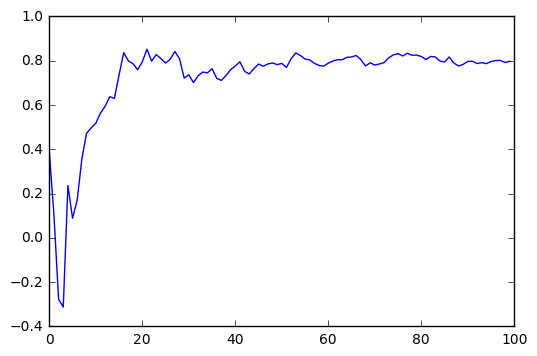

In [4]:
# Show history of outputs
print('Level pull history: \n', data[:10], '\n')

# Show the cumulative sum
print('Cumulative sum of rewards: \n', np.cumsum(data)[:10], '\n')

# Show the cumulative sum divided by the number of trials to get a moving average
print('Moving average of rewards: \n', (np.cumsum(data)/(np.arange(100) + 1))[:10], '\n')

# Plot this moving average
plt.plot(np.cumsum(data)/(np.arange(100) + 1))
plt.show()

In [5]:
# Now let's make that into something repeatable
def run_experiment(m1, m2, m3, eps, N):
    multi_armed_bandit = [Bandit_lever(m1), Bandit_lever(m2), Bandit_lever(m3)]

    data = np.zeros(N)

    for i in range(N):
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([lever_reward.mean for lever_reward in multi_armed_bandit])
        x = multi_armed_bandit[j].pull()
        multi_armed_bandit[j].update(x)

        # For the plot
        data[i] = x
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # Plot moving average
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for lever_reward in multi_armed_bandit:
        print(lever_reward.mean)

    return cumulative_average

Above it was easy to see how quickly the gambler converged upon choosing the optimal lever. Now lets try to se a few different experiments along the same lines to see the behavior of these models. Try to notice where it spikes to the max lever more consistently.

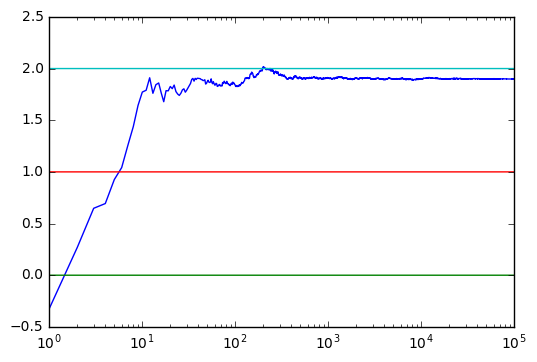

0.010741574204341553
0.9984394164070092
1.9984482226716538


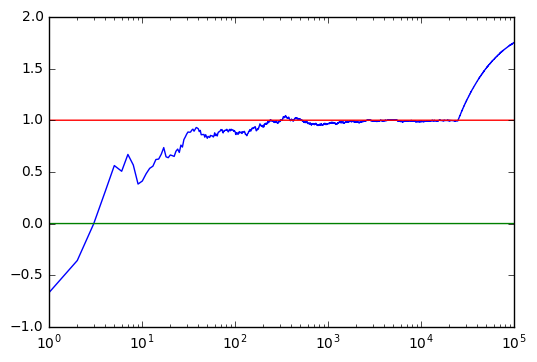

0.19796106565584015
0.9965389743991615
2.0016823593273343


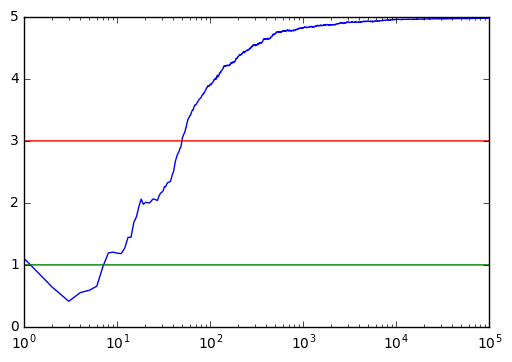

0.9797937486809084
2.979664625759119
5.0007835905741445


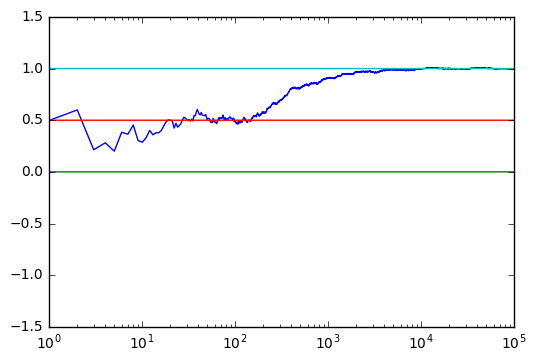

-0.03535731148502843
0.4846875632538542
1.000449440072377


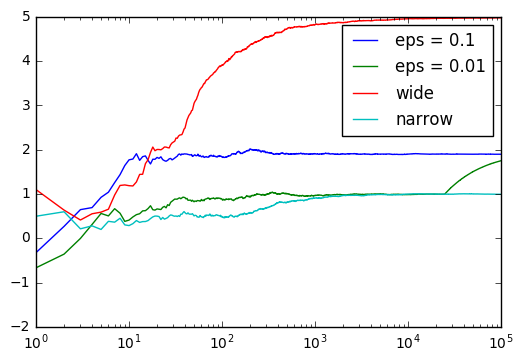

In [6]:
# Run with different epsilons
e_1 = run_experiment(0.0, 1.0, 2.0, 0.1, 100000)
e_001 = run_experiment(0.0, 1.0, 2.0, 0.001, 100000)

# Run with different bandit averages
wide = run_experiment(1.0, 3.0, 5.0, 0.01, 100000)
narrow = run_experiment(0.0, 0.5, 1.0, 0.01, 100000)

# log scale plot
plt.plot(e_1, label='eps = 0.1')
plt.plot(e_001, label='eps = 0.01')
plt.plot(wide, label='wide')
plt.plot(narrow, label='narrow')
plt.legend()
plt.xscale('log')
plt.show()